In [1]:
#!ls
#!source linvenv/bin/activate
#!pip3 install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd 
import os
import tensorflow as tf 
import matplotlib.pyplot as plt
#import seaborn as sns
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_csv=pd.read_csv(r"C:\Users\user\Desktop\Project\Dataset\train.csv")

In [4]:
train_csv.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [5]:
li=train_csv['label'].unique()
#print(li)
#print(sum(train_csv['label']==li[0]))
total=[]
for i in range(len(li)):
    total.append(sum(train_csv['label']==li[i]))
print(total)

[479, 380, 337, 1738, 965, 1442, 620, 1594, 1764, 1088]


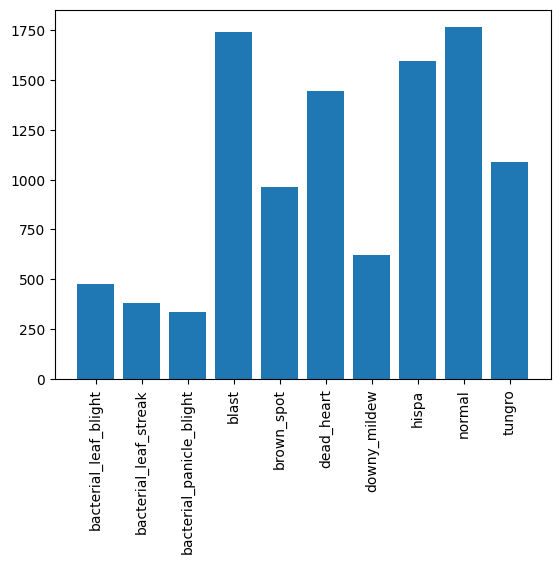

In [6]:
plt.bar(li,total)
plt.xticks(rotation=90)
plt.show()

In [7]:
data=tf.keras.utils.image_dataset_from_directory(r'C:\Users\user\Desktop\Project\Dataset\train_images',
                                                batch_size=32,image_size=(240,320))

Found 10407 files belonging to 10 classes.


In [8]:
data_iterator=data.as_numpy_iterator()

In [9]:
data_iterator

In [10]:
batch=data_iterator.next()

In [11]:
# Image 
batch[0].shape

(32, 240, 320, 3)

In [12]:
# Image labels
print(batch[1])
np.unique(batch[1])
# 0 Bacterial leaf blight
# 1 Bacterial leaf streak
# 2 Bacterial panicle blight
# 3 Blast
# 4 Brown spot
# 5 Dead heart
# 6 Downy mildew
# 7 Hispa
# 8 Normal
# 9 Tungro

[9 9 7 7 8 8 9 6 7 5 0 9 6 3 9 8 8 7 5 7 4 5 1 5 3 2 5 8 5 3 2 0]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

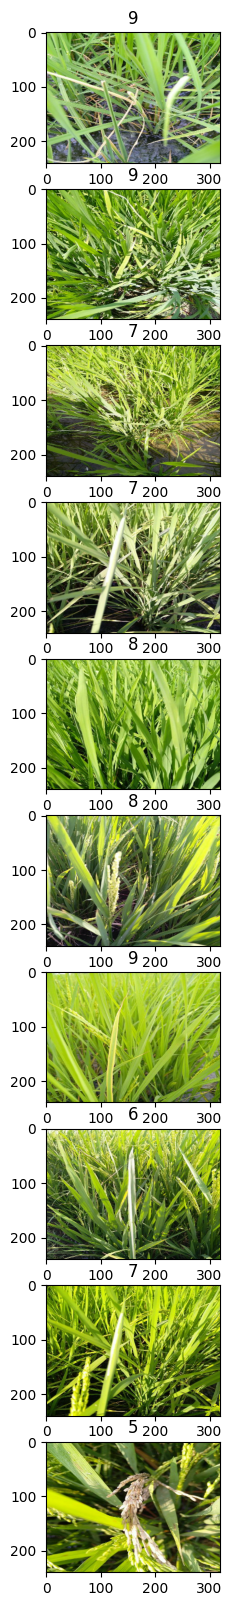

In [13]:
fig,ax=plt.subplots(nrows=10,figsize=(20,20))
for indx,img in enumerate(batch[0][:10]):
    ax[indx].imshow(img.astype(int))
    ax[indx].title.set_text(batch[1][indx])

In [14]:
# Data  Preprocessing

#Converting data into a range of 0 to 1

data=data.map(lambda x,y:(x/255,y))  # x->image y-> label

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [15]:
data.as_numpy_iterator().next()[0].max()

1.0

In [16]:
# Spliting the data

len(data)

326

In [17]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)

In [18]:
print(train_size)
print(val_size)
print(test_size)

228
66
32


In [19]:
# Train,Test and validation partitions
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)
type(train)

tensorflow.python.data.ops.dataset_ops.TakeDataset

In [20]:
# Building the deep learning model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras import regularizers

In [22]:
model=Sequential()

In [23]:
model.add(Conv2D(32,(3,3),1,activation='relu',input_shape=(240,320,3)))
model.add(MaxPooling2D())
#model.add(Dropout(0.3))  # For regularization

#model.add(Conv2D(32,(3,3),1,activation='relu',kernel_regularizer=regularizers.l2(0.05)))
#model.add(MaxPooling2D())
model.add(Dropout(0.4))

#model.add(Conv2D(16,(3,3),1,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(MaxPooling2D())
#model.add(Dense(512,activation='relu'))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01)))

#model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(10,activation='sigmoid'))

In [24]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 318, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 159, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 119, 159, 32)      0         
                                                                 
 flatten (Flatten)           (None, 605472)            0         
                                                                 
 dense (Dense)               (None, 256)               155001088 
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [26]:
# Training the data

logdir='logs'

In [27]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
228/228 [==============================] - 714s 3s/step - loss: 9.9258 - accuracy: 0.2182 - val_loss: 2.5683 - val_accuracy: 0.2846
Epoch 2/20
228/228 [==============================] - 745s 3s/step - loss: 2.4294 - accuracy: 0.3177 - val_loss: 2.5374 - val_accuracy: 0.2760
Epoch 3/20
228/228 [==============================] - 714s 3s/step - loss: 2.3256 - accuracy: 0.3564 - val_loss: 2.3342 - val_accuracy: 0.3580
Epoch 4/20
228/228 [==============================] - 998s 4s/step - loss: 2.3108 - accuracy: 0.3698 - val_loss: 2.4028 - val_accuracy: 0.3646
Epoch 5/20
228/228 [==============================] - 786s 3s/step - loss: 2.3315 - accuracy: 0.3905 - val_loss: 2.3983 - val_accuracy: 0.3883
Epoch 6/20
157/228 [===================>..........] - ETA: 26:47 - loss: 2.3695 - accuracy: 0.4128

KeyboardInterrupt: 

In [ ]:
hist.history

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
# Evaluate Performance

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [ ]:
precision=Precision()
recall=Recall()
accuracy=CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X,y=batch
    ypredict=model.predict(X)
    #precision.update_state(y,ypredict)
    #recall.update_state(y, ypredict)
    #accuracy.update_state(y, ypredict)

In [ ]:
predict=model.predict(test)
y_pred=np.argmax(predict,axis=1)
#print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
class_indices={
    0 :'Bacterial leaf blight',
    1 :'Bacterial leaf streak',
    2 :'Bacterial panicle blight',
    3 :'Blast',
    4 :'Brown spot',
    5 :'Dead heart',
    6 :'Downy mildew',
    7:'Hispa',
    8: 'Normal',
    9:'Tungro'
}
g_dict = class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))